In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_data
from node import get_node_data
import pandas as pd
import numpy as np

In [3]:
raw_data = read_data()
# nodes = {"pi"+str(i+2):i for i in range(4)}
nodes = ["pi2", "pi3", "pi4", "pi5"]

In [4]:
data = {}
m=200
for experiment in range(1,4):
    node_data, models, inliers = get_node_data(raw_data, experiment, return_models=True)
    for i in range(4):
        node_data[i] = node_data[i].sample(230).reset_index(drop=True)
    data[experiment] = {"sampled_data" : node_data, "models" : models, "inliers" : inliers, "raw_data" : raw_data}

## Visualising Data

In [5]:
from visualising import visualise_experiments
# visualise_experiments(data)

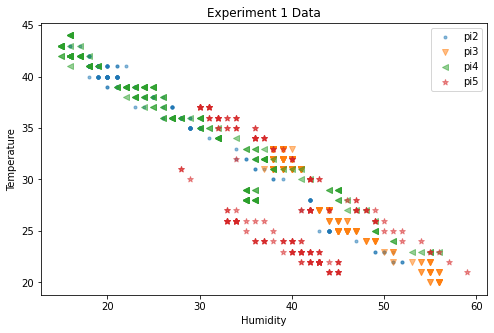

In [9]:
from visualising import visualise_experiment
visualise_experiment(data[1]["sampled_data"])

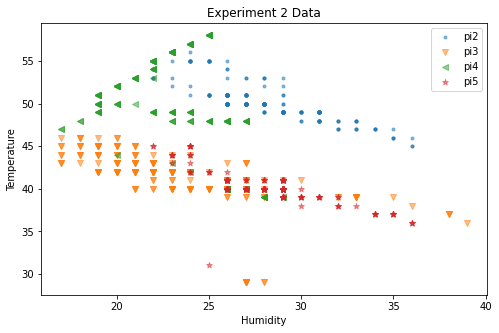

In [10]:
visualise_experiment(data[2]["sampled_data"])

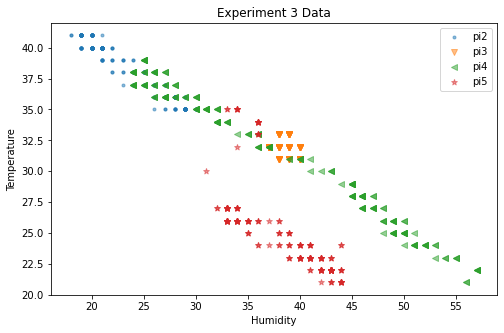

In [11]:
visualise_experiment(data[3]["sampled_data"])

## Similarity MMD

In [5]:
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
from prettytable import PrettyTable

def bandwidth_experiment(samples, similar_nodes, other_nodes, bandwidths, kernel):
    print(kernel.upper(), "\n")
    t = PrettyTable(['Bandwidth', 'Similarity MMD', 'Dissimilarity MMD'])
    for bandwidth in bandwidths:
        avg_sim_mmd, avg_dis_mmd, s, d = ASDMMD(samples, similar_nodes, other_nodes, kernel, bandwidth)
        t.add_row([bandwidth, avg_sim_mmd, avg_dis_mmd])
        print(s)
        print(d)
        print()
        
    print(t)
    print()

### Experiment 1

Nodes pi2 and pi4 are similar according to mmd and nodes pi3 and pi5 are similar to each other but not to the others

In [6]:
from maximum_mean_discrepancy import get_tensor_samples
tensor_samples = get_tensor_samples(data[1]["sampled_data"], sample_size=m)

In [11]:
similar_nodes = ["pi2","pi4"]
other_nodes = ["pi3","pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1, 10, 5), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi2', 'pi4') | 2.0388641357421875 |
+----------------+--------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') | 35.446929931640625 |
| ('pi3', 'pi4') | 35.68244934082031  |
| ('pi5', 'pi2') | 26.60894775390625  |
| ('pi5', 'pi4') | 26.812850952148438 |
| ('pi3', 'pi5') |   3.822509765625   |
+----------------+--------------------+

+----------------+------------------+
|     Nodes      |   Similar MMD    |
+----------------+------------------+
| ('pi2', 'pi4') | 6.11651611328125 |
+----------------+------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') |   106.3408203125   |
| ('pi3', 'pi4') | 107.04754638671875 |
| ('pi5', 'pi2') |  79.826904296875   |


similar_sets = ["pi3", "pi5"]
dissimilar_sets = ["pi2", "pi4"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1, 10, 5), "rbf")

### Experiment 3

Nodes pi3, pi4, pi5 are dissimilar with pi2. Nodes pi3 and pi4 are similar to each other and similar to pi5.

In [12]:
tensor_samples = get_tensor_samples(data[3]["sampled_data"], sample_size=m)

In [13]:
similar_nodes = ["pi2", "pi4"]
other_nodes = ["pi3", "pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1,5 , 4), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi2', 'pi4') | 30.900558471679688 |
| ('pi3', 'pi2') | 28.728729248046875 |
| ('pi3', 'pi4') | 2.6090240478515625 |
| ('pi5', 'pi4') | 6.4317474365234375 |
| ('pi3', 'pi5') |  7.85955810546875  |
+----------------+--------------------+
+----------------+-----------------+
|     Nodes      |  Dissimilar MMD |
+----------------+-----------------+
| ('pi5', 'pi2') | 44.160888671875 |
+----------------+-----------------+

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi2', 'pi4') |   92.70166015625  |
| ('pi3', 'pi2') |  86.186279296875  |
| ('pi3', 'pi4') |  7.8270263671875  |
| ('pi5', 'pi4') | 19.29534912109375 |
| ('pi3', 'pi5') | 23.57867431640625 |
+----------------+-------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+-------------

similar_sets = ["pi2", "pi3", "pi4"]
dissimilar_sets = ["pi5"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1,5 , 4), "rbf")

### Experiment 2

In [14]:
tensor_samples = get_tensor_samples(data[2]["sampled_data"], sample_size=m)

In [15]:
similar_nodes = ["pi3", "pi5"]
other_nodes = ["pi2", "pi4"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(5,100 , 5), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi3', 'pi5') | 4.8838043212890625 |
+----------------+--------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi2', 'pi3') | 13.26214599609375  |
| ('pi2', 'pi5') | 12.940963745117188 |
| ('pi4', 'pi3') | 12.690093994140625 |
| ('pi4', 'pi5') | 17.444656372070312 |
| ('pi2', 'pi4') | 5.772369384765625  |
+----------------+--------------------+

+----------------+------------------+
|     Nodes      |   Similar MMD    |
+----------------+------------------+
| ('pi3', 'pi5') | 14.6514892578125 |
+----------------+------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
| ('pi2', 'pi3') | 39.78643798828125 |
| ('pi2', 'pi5') | 38.82293701171875 |
| ('pi4', 'pi3') | 38.07012939453125 |
| ('pi

## Testing Hypothesis

In [5]:
from modelling import grid_search_models, fit_clf, score_clf, select_model_data  
from similar import get_similar_pairs_nodes

def test_in_pairs(similar_pairs, model_data, models):
    l = []
    for pair in similar_pairs:
        x = model_data[pair[0]]
        y = model_data[pair[1]]
        
        model_x = models[pair[0]]
        ex = fit_clf(model_x, x)
        exy = score_clf(model_x, y)

        model_y = models[pair[1]]
        ey = fit_clf(model_y, y)
        eyx = score_clf(model_y, x)       
        
        l.append(pd.DataFrame([{"model_node" : pair[1], "test_node" : pair[0], "discrepancy" : abs(ex-eyx)}]))
        l.append(pd.DataFrame([{"model_node" : pair[0], "test_node" : pair[1], "discrepancy" : abs(ey-exy)}]))
    return pd.concat(l)

def test_hypothesis(clf_name, model_data, similar_pairs, similar_nodes): 
    models, models_df = grid_search_models(clf_name, model_data, similar_nodes)
    test_df = test_in_pairs(similar_pairs, model_data, models)
    return models_df.merge(test_df, how='outer', on='model_node')
    
def test_hypothesis_all_clfs(experiment, similar_pairs, similar_nodes, standardised):
    model_data = select_model_data(data[experiment]["sampled_data"], similar_nodes, standardised)
    svr_df = test_hypothesis("svr", model_data, similar_pairs, similar_nodes)
    lsvr_df = test_hypothesis("lsvr", model_data, similar_pairs, similar_nodes)
    lreg_df = test_hypothesis("lreg", model_data, similar_pairs, similar_nodes)
    return pd.concat([svr_df, lsvr_df, lreg_df])

def test_hypothesis_all_methods_clfs(experiment, similar_pairs, similar_nodes):
    l = []
    for standardised in [False, True]:
        if standardised:
            msg = "standardised"
        else:
            msg = "normal"
            
        print(f"Using {msg} data, testing methods MMD", end="")
        mmd_df = test_hypothesis_all_clfs(experiment, similar_pairs[0], similar_nodes[0], standardised)
        mmd_df["method"] = ["MMD"] * mmd_df.shape[0]
        mmd_df["std"] = [standardised] * mmd_df.shape[0]
        l.append(mmd_df)
        
        print(", OCSVM", end="")
        ocsvm_df = test_hypothesis_all_clfs(experiment, similar_pairs[1], similar_nodes[1], standardised)
        ocsvm_df["method"] = ["OCSVM"] * ocsvm_df.shape[0]
        ocsvm_df["std"] = [standardised] * ocsvm_df.shape[0]
        l.append(ocsvm_df)
        
        if len(similar_pairs[2]) != 0:
            print(", MMD OCSVM Verify", end="")
            verify_df = test_hypothesis_all_clfs(experiment, similar_pairs[2], similar_nodes[2], standardised)
            verify_df["method"] = ["MMD OCSVM Verify"] * verify_df.shape[0]
            verify_df["std"] = [standardised] * verify_df.shape[0]
            l.append(verify_df)
        print()
    
    df = pd.concat(l).reset_index(drop=True)
    df["epxeriment"] = [experiment] * df.shape[0]
    return df

In [ ]:
similar_pairs, similar_nodes = get_similar_pairs_nodes(1, data, "trio", similar_pairs_args = [("linear", 0.5), (0.45, False)])
exp1 = test_hypothesis_all_methods_clfs(1, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4'), ('pi3', 'pi5')] using the OCSVM method.

The average MMD between similar sets is 10.3623046875
The following pairs of nodes were deemed similar [('pi2', 'pi4')] using the MMD method.

Using normal data, testing methods MMD, OCSVM

In [28]:
similar_pairs, similar_nodes = get_similar_pairs_nodes("trio", similar_pairs_args = [(2, "linear", 0.7), (0.45, False)])
exp2 = test_hypothesis_all_methods_clfs(2, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 31.771728515625
The following pairs of nodes were deemed similar [('pi3', 'pi5')] using the MMD method.

Using standardised data, testing methods MMD, OCSVM
Using normal data, testing methods MMD, OCSVM


In [29]:
similar_pairs, similar_nodes = get_similar_pairs_nodes("trio", similar_pairs_args = [(3, "linear", 0.5), (0.45, False)])
exp3 = test_hypothesis_all_methods_clfs(3, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 24.6278076171875
The following pairs of nodes were deemed similar [('pi3', 'pi4')] using the MMD method.

Using standardised data, testing methods MMD, OCSVM, MMD OCSVM Verify
Using normal data, testing methods MMD, OCSVM, MMD OCSVM Verify


In [30]:
results = pd.concat([exp1, exp2, exp3])
results

,model_node,model,score,test_node,discrepancy,method,std,epxeriment
0,pi2,SVR(C=100),0.990729,pi4,0.074386,MMD,True,1
1,pi4,"SVR(C=100, epsilon=0.2)",0.963401,pi2,0.122683,MMD,True,1
2,pi2,SVR(kernel='linear'),0.986840,pi4,0.003776,MMD,True,1
3,pi4,"SVR(C=10, epsilon=0.2, kernel='linear')",0.922843,pi2,0.008329,MMD,True,1
4,pi2,LinearRegression(),0.986870,pi4,0.006617,MMD,True,1
...,...,...,...,...,...,...,...,...
43,pi3,"SVR(C=0.1, epsilon=0.2)",0.119004,pi4,1.005611,MMD OCSVM Verify,False,3
44,pi4,SVR(kernel='linear'),0.986405,pi3,2.133605,MMD OCSVM Verify,False,3
45,pi3,SVR(kernel='linear'),0.018178,pi4,0.756724,MMD OCSVM Verify,False,3
46,pi4,LinearRegression(),0.986455,pi3,1.995753,MMD OCSVM Verify,False,3


In [33]:
results.to_csv("results/methods_results.csv", index=False)